In [170]:
import matplotlib.pyplot as plt
import os
import shutil
import zipfile
import glob
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import pydot
import graphviz
# import pydotplus

In [171]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

### attention dot product

In [311]:
# Add attention layer to the deep learning network
class my_attention(Layer):
    def __init__(self,**kwargs):
        super(my_attention,self).__init__(**kwargs)
 
    def build(self,input_shape):      
        super(my_attention, self).build(input_shape)
 
    def call(self,x):
        
        # set last hidden state
        print(x.shape)
        last_hidden_state = tf.slice(x,[0,x.shape[1] - 1,0],size = [-1,-1,-1])
        last_hidden_state = K.squeeze(last_hidden_state,axis=1)
        
        # reshape
#         last_hidden_state = K.reshape(last_hidden_state,(x.shape[2],-1))
#         last_hidden_state = K.reshape(last_hidden_state,(x.shape[2],-1))
#         last_hidden_state = K.reshape(last_hidden_state,(-1,))
        print(last_hidden_state)
        
        # dot product
        e = K.dot(x, last_hidden_state)
        print(f'e   shape : {e.shape}')
#         e = K.squeeze(e, axis = -1)
        print(f'e   shape : {e.shape}')
        
        # Compute the weights
        alpha = K.softmax(e)
        print(f'alpha   shape : {alpha.shape}')
        
        # Reshape to tensorFlow format
#         alpha = K.expand_dims(alpha, axis=-1)
#         print(f'alpha   shape : {alpha.shape}')
        
        # Compute the context vector
        context = x * alpha
        
        print(f'context shape : {context.shape}')
        context = K.sum(context, axis=1)
        print(f'context shape : {context.shape}')
        return context

In [312]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # set last hidden state
        print(x.shape)
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        print(f'e   shape : {e.shape}')
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)
        print(f'e   shape : {e.shape}')
        # Compute the weights
        alpha = K.softmax(e)
        print(f'alpha   shape : {alpha.shape}')
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        print(f'alpha   shape : {alpha.shape}')
        # Compute the context vector
        context = x * alpha
        print(f'context shape : {context.shape}')
        context = K.sum(context, axis=1)
        print(f'context shape : {context.shape}')
        return context

In [328]:
# Input Layer 0 ===============================================================================================================
# input shape : (nTimeSteps, nFeatures)
layer_input_market = tf.keras.Input(shape = (nTimeStep,Feature), name = "market_input")

# market Dense
Transformer_market = tf.keras.layers.Dense(64, activation="tanh", name = "trans_market")
gru_input_marekt  = Transformer_market(layer_input_market)

gru_layer_market    = tf.keras.layers.GRU(3,return_sequences = True, name = 'gru_market')(gru_input_marekt)
attention_layer_market  = my_attention(name = 'attention_market')(gru_layer_market)
output = tf.keras.layers.Dense(1)(attention_layer_market)
model = tf.keras.Model(layer_input_market, output)
model.compile(optimizer = 'Adam', loss = 'mse')

(None, 10, 3)
Tensor("attention_market_54/Squeeze:0", shape=(None, 3), dtype=float32)
e   shape : (None, 10, 3)
e   shape : (None, 10, 3)
alpha   shape : (None, 10, 3)
context shape : (None, 10, 3)
context shape : (None, 3)


In [329]:
model.fit(Train_GRU_x, np.array([Train_GRU_y[s][0] for s in range(len(Train_GRU_y))]), epochs=1)

Train on 1041 samples
(None, 10, 3)
Tensor("model_22/attention_market/Squeeze:0", shape=(None, 3), dtype=float32)
e   shape : (None, 10, 3)
e   shape : (None, 10, 3)
alpha   shape : (None, 10, 3)
context shape : (None, 10, 3)
context shape : (None, 3)
(None, 10, 3)
Tensor("model_22/attention_market/Squeeze:0", shape=(None, 3), dtype=float32)
e   shape : (None, 10, 3)
e   shape : (None, 10, 3)
alpha   shape : (None, 10, 3)
context shape : (None, 10, 3)
context shape : (None, 3)
  32/1041 [..............................] - ETA: 36s

InvalidArgumentError:  Matrix size-incompatible: In[0]: [320,3], In[1]: [32,3]
	 [[node model_22/attention_market/MatMul (defined at <ipython-input-311-caa8a2de67ab>:23) ]] [Op:__inference_distributed_function_42002]

Function call stack:
distributed_function


In [314]:
# Input Layer 0 ===============================================================================================================
# input shape : (nTimeSteps, nFeatures)
layer_input_market = tf.keras.Input(shape = (nTimeStep,Feature), name = "market_input")

# market Dense
Transformer_market = tf.keras.layers.Dense(64, activation="tanh", name = "trans_market")
gru_input_marekt  = Transformer_market(layer_input_market)

gru_layer_market    = tf.keras.layers.GRU(3,return_sequences = True, name = 'gru_market')(gru_input_marekt)
attention_layer_market  = attention(name = 'attention_market')(gru_layer_market)
output = tf.keras.layers.Dense(1)(attention_layer_market)
model = tf.keras.Model(layer_input_market, output)
model.compile(optimizer = 'Adam', loss = 'mse')

(None, 10, 3)
e   shape : (None, 10, 1)
e   shape : (None, 10)
alpha   shape : (None, 10)
alpha   shape : (None, 10, 1)
context shape : (None, 10, 3)
context shape : (None, 3)


In [315]:
# =========================================
# 시계열 데이터 생성
# =========================================
n = 2349
p = 5
b_vec = np.arange(p,0,-1)/10
x_mat = np.random.normal(0,1,[n,p])
y_vec = np.dot(x_mat,b_vec) + np.random.normal(0,1,n)
# y_vec = y_vec.cumsum()
# y_vec = y_vec + abs(y_vec.min() )+ 100

In [316]:
# =========================================
# X ,Y 데이터 생성
# =========================================
columns = ["xvar_{}".format(x) for x in np.arange(0,p)]
xDF = pd.DataFrame(x_mat, columns = columns)
yDF = pd.DataFrame(y_vec,columns = ['Price'])
xyDF = pd.concat([xDF,yDF], axis = 1)

In [317]:
# =========================================
# Date 데이터 생성
# =========================================
xyDF['Date'] = pd.date_range(start = '2013-01-01', end = '2021-12-31', freq = '1B')

In [318]:
# =========================================
# 65일 후 주가 예측 모델을 위한 데이터 전처리
# 학습      : 1040일(4년)
# Valdation : 65일(3개월)
# Test      : 65일 (3개월) 
# =========================================

model_code = 65
base_date = '20210101'

test_end_date = pd.date_range(base_date, periods=2, freq = "{}B".format(model_code))[1]
test_start_date = pd.date_range(test_end_date, periods = 2, freq = "-{}B".format(model_code))[1]
valid_end_date = pd.date_range(test_start_date, periods = 2, freq = "-1B".format(model_code))[1]
# valid_end_date = pd.date_range(test_start_date, periods = 2, freq = "-{}B".format(model_code))[1]
valid_start_date = pd.date_range(valid_end_date, periods = 2, freq = "-{}B".format(model_code))[1]
train_end_date = pd.date_range(valid_start_date, periods = 2, freq = "-{}B".format(1))[1]
train_start_date = pd.date_range(train_end_date, periods = 2, freq = "-{}B".format(1040))[1]


date_df = pd.DataFrame({"train_start" : train_start_date,
                        "train_end" : train_end_date,
                        "valid_start" : valid_start_date,
                        "valid_end" : valid_end_date,
                        "test_start" : test_start_date,
                        "test_end" : test_end_date}, index = [0])

date_df

,train_start,train_end,valid_start,valid_end,test_start,test_end
0,2016-10-05,2020-09-30,2020-10-01,2020-12-31,2021-01-01,2021-04-02


In [319]:
# =========================================
# Y 및 Y의 일자 생성
# =========================================
xyDF['Y'] = xyDF['Price'].shift(-1)
# xyDF['Y'] = xyDF['Price'].pct_change(65).shift(-65)
xyDF['Y_DATE'] = list(map(lambda xx : pd.date_range(xx, periods = 2, freq = '65B')[1],xyDF.Date))

In [320]:
# =========================================
# GRU X 데이터 생성을 위한 인덱스 Array 만들기
# EX)
#  : np.arange(0, 0 + nSteps * nInterval ,nInterval)
#  : np.arange(1, 1 + nSteps * nInterval ,nInterval)
#  : np.arange(2, 3 + nSteps * nInterval ,nInterval)
#  : np.arange(2209, 2209 + nSteps * nInterval ,nInterval)
#  : np.arange(x, x + nSteps * nInterval, nInterval)
# =========================================

nSteps = 10
nInterval = 10
dimBatch = len(xyDF) - nInterval*(nSteps - 1)
listidx = [np.arange(x, x + nSteps * nInterval, nInterval) for x in range(dimBatch)]

In [321]:
# =========================================
# GRU X, Y 데이터 생성
# =========================================

x_var = [s for s in xyDF.columns if 'xvar' in s]
#x_var = [s for s in xyDF.columns if 'Price' in s]
GRU_x = []
GRU_y = []
GRU_date = []

for i in range(dimBatch):
    
    ind = listidx[i]
    sub_xyDF = xyDF.iloc[ind,:]
    x = np.array(sub_xyDF[x_var])
    y = np.array(sub_xyDF['Y'])        # 해당 X의 가장 마지막 Y
    date = sub_xyDF.tail(1)[["Date","Y_DATE"]] # 해당 Y의 일자 -> Train, Valid, Test 구분을 위해 필요
    
    GRU_x.append(x)
    GRU_y.append(y)
    GRU_date.append(date)
    
    del(x,y,date,ind,sub_xyDF)
    
GRU_x = np.array(GRU_x)
GRU_y = np.array(GRU_y)
GRU_date = pd.concat(GRU_date)

In [322]:
print('X shape : ', GRU_x.shape)
print('y shape : ', GRU_y.shape)
print('date shape : ', GRU_date.shape)

X shape :  (2259, 10, 5)
y shape :  (2259, 10)
date shape :  (2259, 2)


In [323]:
# =========================================
# Train, Valid, Test 데이터로 분할
# =========================================

# 날짜 데이터 프레임으로 Train, Valid, Test Index 생성
Train_Index = (date_df.train_start[0] <= GRU_date.Y_DATE)& (GRU_date.Y_DATE <= date_df.train_end[0])
Valid_Index = (date_df.valid_start[0] <= GRU_date.Y_DATE)& (GRU_date.Y_DATE <= date_df.valid_end[0])
Test_Index = (date_df.test_start[0] <= GRU_date.Y_DATE)& (GRU_date.Y_DATE <= date_df.test_end[0])

# Train, Valid, Test 데이터 생성
Train_GRU_x = GRU_x[Train_Index,:,:]
Train_GRU_y = GRU_y[Train_Index,:]

Valid_GRU_x = GRU_x[Valid_Index,:,:]
Valid_GRU_y = GRU_y[Valid_Index,:]

Test_GRU_x = GRU_x[Test_Index,:,:]
Test_GRU_y = GRU_y[Test_Index,:]

In [324]:
# =========================================
# Min, Max Scale
# =========================================
# 각 Feature 별 Min Max 값 생성
Min_Max_DF = pd.DataFrame({})
for ind in range(Train_GRU_x.shape[2]):
    Max = Train_GRU_x[:,:,ind].max()
    Min = Train_GRU_x[:,:,ind].min()
    Min_Max_DF = pd.concat([Min_Max_DF, pd.DataFrame({"Feature_No": ind , "Max" : Max, "Min" : Min}, index = [0])])
    
Min_Max_DF.reset_index(drop = True, inplace = True)


# 각 Feature 별 Min Max Scale 진행
for ind in range(Train_GRU_x.shape[2]):
    # Train Min Max Scale
    Train_GRU_x[:,:,ind] = (Train_GRU_x[:,:,ind] - Min_Max_DF.iloc[ind,2])/(Min_Max_DF.iloc[ind,1] - Min_Max_DF.iloc[ind,2])

    # Valid Min Max Scale
    Valid_GRU_x[:,:,ind] = (Valid_GRU_x[:,:,ind] - Min_Max_DF.iloc[ind,2])/(Min_Max_DF.iloc[ind,1] - Min_Max_DF.iloc[ind,2])
    Valid_GRU_x[:,:,ind] = np.where(Valid_GRU_x[:,:,ind] >= 1 , 1, Valid_GRU_x[:,:,ind] ) # Train 에서 생성된 Max값으로 Scale 하기 때문에 
    Valid_GRU_x[:,:,ind] = np.where(Valid_GRU_x[:,:,ind] <= 0 , 0, Valid_GRU_x[:,:,ind] ) # Train 에서 생성된 Min값으로 Scale 하기 때문에

    # Test Min Max Scale
    Test_GRU_x[:,:,ind] = (Test_GRU_x[:,:,ind] - Min_Max_DF.iloc[ind,2])/(Min_Max_DF.iloc[ind,1] - Min_Max_DF.iloc[ind,2])
    Test_GRU_x[:,:,ind] = np.where(Test_GRU_x[:,:,ind] >= 1 , 1, Test_GRU_x[:,:,ind] ) # Train 에서 생성된 Max값으로 Scale 하기 때문에 
    Test_GRU_x[:,:,ind] = np.where(Test_GRU_x[:,:,ind] <= 0 , 0, Test_GRU_x[:,:,ind] ) # Train 에서 생성된 Min값으로 Scale 하기 때문에

In [325]:
nTimeStep = 10
Feature = 5

In [326]:
# Input Layer 0 ===============================================================================================================
# input shape : (nTimeSteps, nFeatures)
layer_input_market = tf.keras.Input(shape = (nTimeStep,Feature), name = "market_input")

# market Dense
Transformer_market = tf.keras.layers.Dense(64, activation="tanh", name = "trans_market")
gru_input_marekt  = Transformer_market(layer_input_market)

gru_layer_market    = tf.keras.layers.GRU(3,return_sequences = True, name = 'gru_market')(gru_input_marekt)
attention_layer_market  = attention(name = 'attention_market')(gru_layer_market)
output = tf.keras.layers.Dense(1)(attention_layer_market)
model = tf.keras.Model(layer_input_market, output)
model.compile(optimizer = 'Adam', loss = 'mse')

(None, 10, 3)
e   shape : (None, 10, 1)
e   shape : (None, 10)
alpha   shape : (None, 10)
alpha   shape : (None, 10, 1)
context shape : (None, 10, 3)
context shape : (None, 3)


In [327]:
model.fit(Train_GRU_x, np.array([Train_GRU_y[s][0] for s in range(len(Train_GRU_y))]), epochs=1)

Train on 1041 samples
(None, 10, 3)
e   shape : (None, 10, 1)
e   shape : (None, 10)
alpha   shape : (None, 10)
alpha   shape : (None, 10, 1)
context shape : (None, 10, 3)
context shape : (None, 3)
(None, 10, 3)
e   shape : (None, 10, 1)
e   shape : (None, 10)
alpha   shape : (None, 10)
alpha   shape : (None, 10, 1)
context shape : (None, 10, 3)
context shape : (None, 3)
1041/1041 [==============================] - 1s 1ms/sample - loss: 1.5551


ValueError: A target array with shape (1041, 10) was passed for an output of shape (None, 1) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

<tf.Tensor 'dense/Identity:0' shape=(None, 1) dtype=float32>

### MultiHead Attention

In [4]:
nTimeStep = 10
Feature = 5
beta = 0.1

In [23]:
# Input Layer 0 ===============================================================================================================
# input shape : (nTimeSteps, nFeatures)
layer_input_market = tf.keras.Input(shape = (nTimeStep,Feature), name = "market_input")


# Stock Input
layer_input_stock_1 = tf.keras.Input(shape = (nTimeStep,Feature), name = "stock_1_input")
layer_input_stock_2 = tf.keras.Input(shape = (nTimeStep,Feature), name = "stock_2_input")
layer_input_stock_3 = tf.keras.Input(shape = (nTimeStep,Feature), name = "stock_3_input")

# market Dense
Transformer_market = tf.keras.layers.Dense(64, activation="tanh", name = "trans_market")
Transformer_stock  = tf.keras.layers.Dense(64, activation="tanh", name = "trans_stock")

# gru input layer
gru_input_marekt  = Transformer_market(layer_input_market)
gru_input_stock_1 = Transformer_stock(layer_input_stock_1)
gru_input_stock_2 = Transformer_stock(layer_input_stock_2)
gru_input_stock_3 = Transformer_stock(layer_input_stock_3)

# lstm layer
gru_layer_market    = tf.keras.layers.GRU(64,return_sequences = True, name = 'gru_market')(gru_input_marekt)
gru_layer_stock_1   = tf.keras.layers.GRU(64,return_sequences = True, name = 'gru_stock_1')(gru_input_stock_1)
gru_layer_stock_2   = tf.keras.layers.GRU(64,return_sequences = True, name = 'gru_stock_2')(gru_input_stock_2)
gru_layer_stock_3   = tf.keras.layers.GRU(64,return_sequences = True, name = 'gru_stock_3')(gru_input_stock_3)

# attention layer
attention_layer_market  = attention(name = 'attention_market')(gru_layer_market)
attention_layer_stock_1 = attention(name = 'attention_stock1')(gru_layer_stock_1)
attention_layer_stock_2 = attention(name = 'attention_stock2')(gru_layer_stock_2)
attention_layer_stock_3 = attention(name = 'attention_stock3')(gru_layer_stock_3)

# beta layer
weighted_layer_market = tf.keras.layers.Lambda(lambda x : x*beta)(attention_layer_market)

# concate
h_layer_stock_1 = tf.keras.layers.add([attention_layer_stock_1, weighted_layer_market],name = 'h_stock_1')
h_layer_stock_2 = tf.keras.layers.add([attention_layer_stock_2, weighted_layer_market],name = 'h_stock_2')
h_layer_stock_3 = tf.keras.layers.add([attention_layer_stock_3, weighted_layer_market],name = 'h_stock_3')

# reshape layer
reshape_layer_stock_1 = tf.keras.layers.Reshape((1, h_layer_stock_1.shape[1]), input_shape=(h_layer_stock_1.shape[1],),name = 'reshape_stock_1')(h_layer_stock_1)
reshape_layer_stock_2 = tf.keras.layers.Reshape((1, h_layer_stock_2.shape[1]), input_shape=(h_layer_stock_2.shape[1],),name = 'reshape_stock_2')(h_layer_stock_2)
reshape_layer_stock_3 = tf.keras.layers.Reshape((1, h_layer_stock_3.shape[1]), input_shape=(h_layer_stock_3.shape[1],),name = 'reshape_stock_3')(h_layer_stock_3)

# multi level context vector
output = tf.keras.layers.concatenate([reshape_layer_stock_1,reshape_layer_stock_2,reshape_layer_stock_3],axis=1)

In [24]:
model = tf.keras.Model(inputs = [layer_input_market,layer_input_stock_1,layer_input_stock_2,layer_input_stock_3], outputs = output)

In [25]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
market_input (InputLayer)       [(None, 10, 5)]      0                                            
__________________________________________________________________________________________________
stock_1_input (InputLayer)      [(None, 10, 5)]      0                                            
__________________________________________________________________________________________________
trans_market (Dense)            (None, 10, 64)       384         market_input[0][0]               
__________________________________________________________________________________________________
stock_2_input (InputLayer)      [(None, 10, 5)]      0                                            
____________________________________________________________________________________________

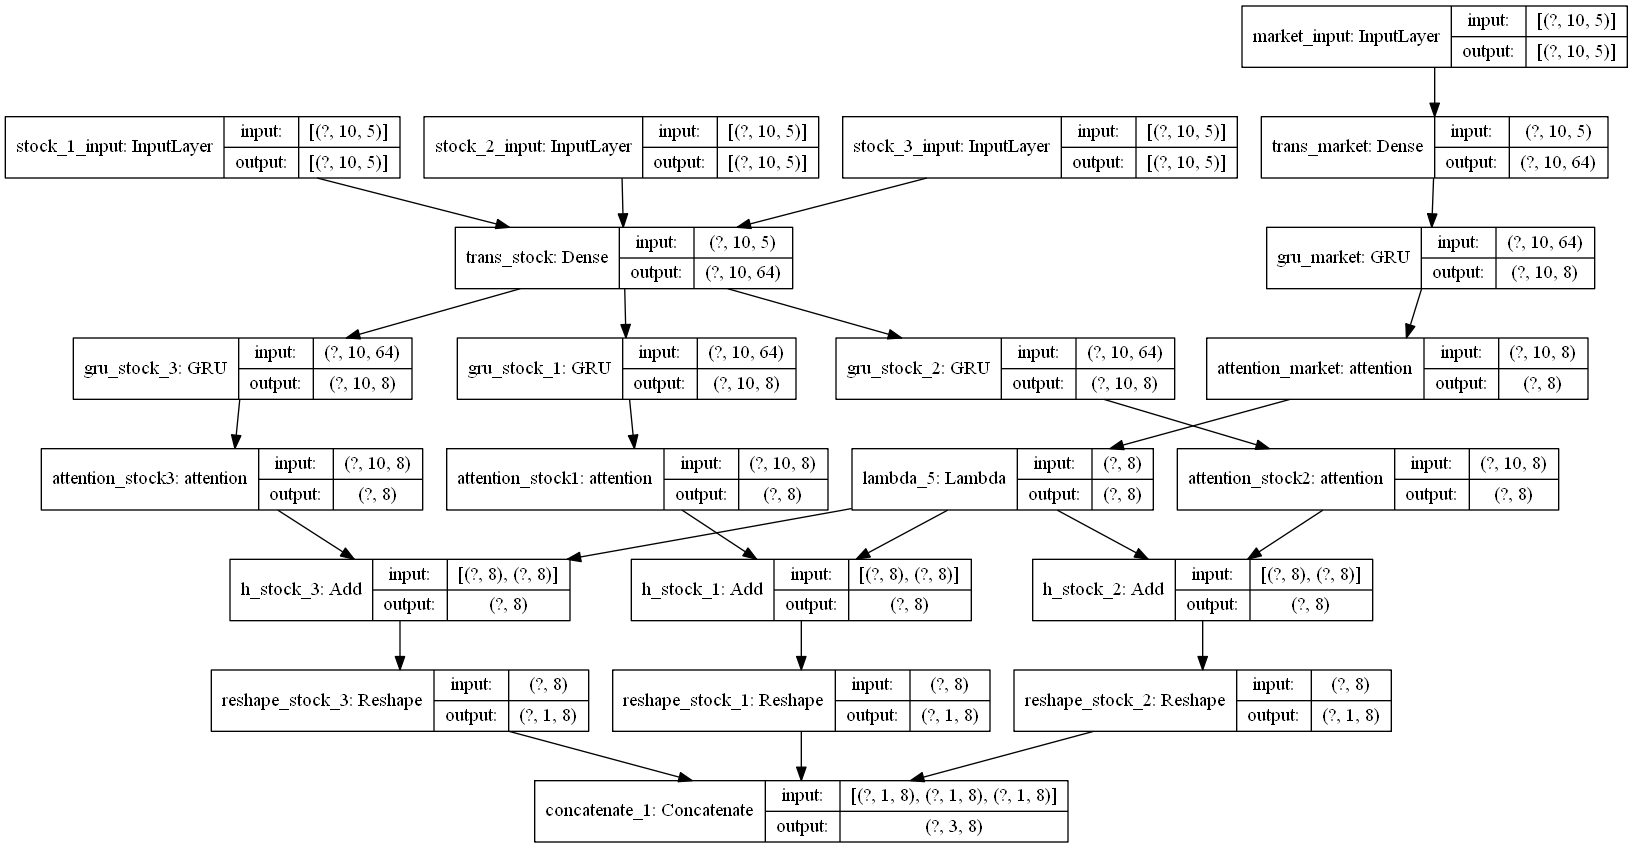

In [21]:
tf.keras.utils.plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)